___
___
___
# EDA
___
___
___

In [17]:
import pandas as pd 

df = pd.read_csv('data_set/SBAnational-EDA.csv')
df.head(3)

,Unnamed: 0,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv
0,0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,IN,451120,1997-02-28,1997-01-01,84,4,2.0,0,0,0,0,N,Y,P I F,60000.0
1,1,NEW PARIS,IN,46526,1ST SOURCE BANK,OH,722410,1997-02-28,1997-01-01,60,2,2.0,0,0,0,0,N,Y,P I F,40000.0
2,2,BLOOMINGTON,MN,47401,WELLS FARGO BANK NATL ASSOC,IL,621210,1997-02-28,1997-01-01,180,7,1.0,0,0,0,0,N,N,P I F,287000.0


### Séparation en liste numériques et catégorielles

In [18]:
df.drop(columns='Unnamed: 0',inplace=True)

colonnes_numeriques = df.select_dtypes(include='number').columns.tolist()
colonnes_categorielles = df.select_dtypes(include ='object').columns.tolist()

print(colonnes_categorielles)
print(colonnes_numeriques)

variables_cat = ['State','Bank','RevLineCr','LowDoc', 'UrbanRural','Zip', 'NAICS', 'NewExist']
variables_num = ['NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'Term', 'SBA_Appv']



['City', 'State', 'Bank', 'BankState', 'ApprovalDate', 'ApprovalFY', 'RevLineCr', 'LowDoc', 'MIS_Status']
['Zip', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'GrAppv']


### NoEmp: Catégorisation des entreprises

In [19]:
# Convertir une colonne de chaînes de caractères en entiers
df['NoEmp'] = df['NoEmp'].astype(int)


In [20]:
# TPE,PME,ETI


# Fonction pour catégoriser les entreprises
def categoriser_entreprise(nombre_employes):

    if nombre_employes == 0:
        return 'NA'
    if nombre_employes > 0 and nombre_employes <= 19:
        return 'TPE'
    elif nombre_employes >= 20 and nombre_employes <= 249:
        return 'PME'
    elif nombre_employes >= 250 and nombre_employes <= 5000:
        return 'ETI'
    else:
        return 'GE'  

# Appliquer la fonction à la colonne 'nombre_employes' pour créer une nouvelle colonne de catégorie
df['NoEmp'] = df['NoEmp'].apply(categoriser_entreprise)

filtre = df['NoEmp']=='GE'


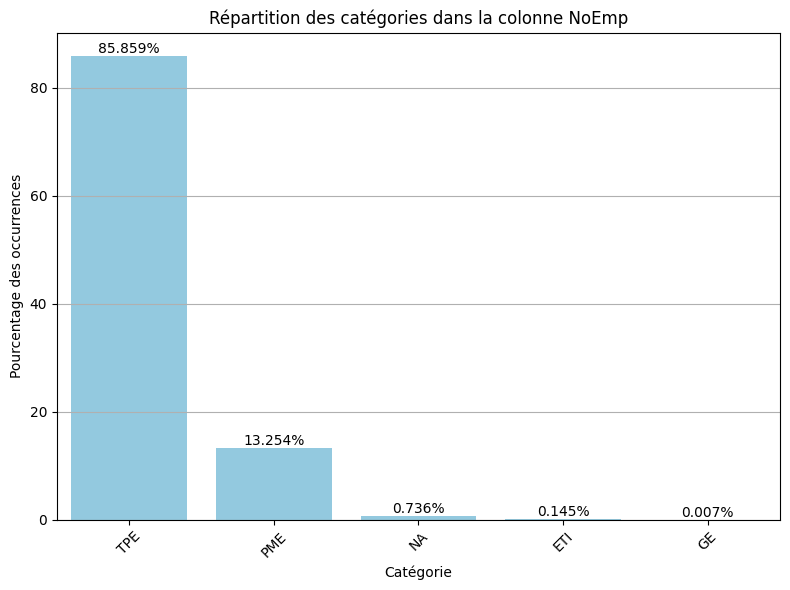

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compter le nombre total d'entrées
total_entries = len(df)

# Compter le nombre d'occurrences de chaque catégorie
repartition_categories = df['NoEmp'].value_counts()


# Calculer les pourcentages
pourcentages = (repartition_categories / total_entries) * 100

# Créer le bar plot avec Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=pourcentages.index, y=pourcentages.values, color='skyblue')
plt.title('Répartition des catégories dans la colonne NoEmp')
plt.xlabel('Catégorie')
plt.ylabel('Pourcentage des occurrences')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.grid(axis='y')  # Affichage de la grille sur l'axe des y
plt.tight_layout()

# Afficher les pourcentages sur l'axe des ordonnées
for i, pourcentage in enumerate(pourcentages):
    plt.text(i, pourcentage, f'{pourcentage:.3f}%', ha='center', va='bottom')

plt.show()


### NewExist

In [22]:
filtre = df['NewExist']== 0.0
df.drop(df[filtre].index,inplace=True)


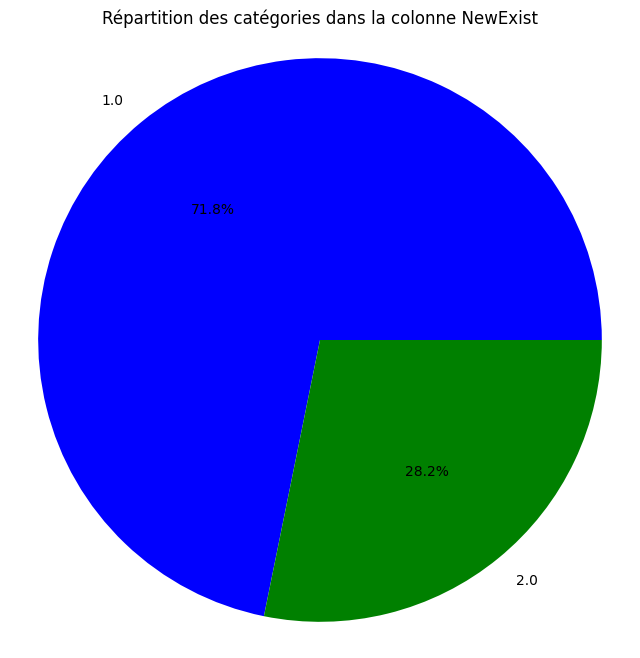

In [23]:
pourcentages = df['NewExist'].value_counts(normalize=True)*100

plt.figure(figsize=(8,8))
plt.pie(x=pourcentages, labels=pourcentages.index, colors=['blue', 'green'], autopct='%1.1f%%',wedgeprops=None)
plt.title('Répartition des catégories dans la colonne NewExist')
plt.axis('equal')  # Pour avoir un cercle parfait
plt.show()

### UrbanRural

In [24]:
df['UrbanRural'].value_counts()

1    467181
0    321951
2    104652
Name: UrbanRural, dtype: int64

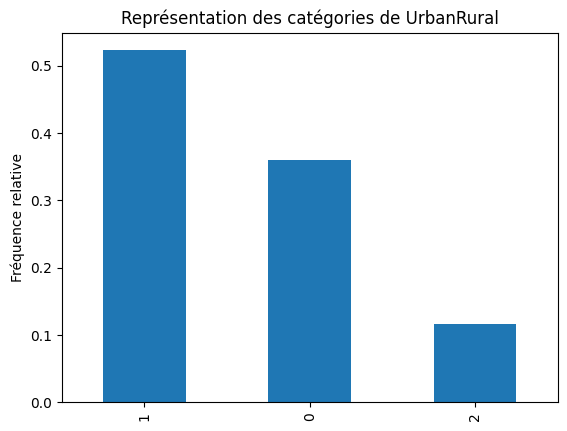

In [25]:
df['UrbanRural'].value_counts(normalize=True).plot(kind='bar', width=0.5)

plt.title('Représentation des catégories de UrbanRural')
plt.ylabel('Fréquence relative')
plt.show()



### GrAppv

In [26]:
df['GrAppv'].describe()

count    8.937840e+05
mean     1.931110e+05
std      2.833839e+05
min      1.000000e+03
25%      3.500000e+04
50%      9.000000e+04
75%      2.250000e+05
max      5.472000e+06
Name: GrAppv, dtype: float64

In [27]:
# Fonction pour catégoriser les entreprises
def categoriser_GrAppv(montant):

    if montant >= 0 and montant <= 34999:
        return '< 35 000'
    elif montant >= 35000 and montant <= 89999:
        return '< 90 000'
    elif montant >= 90000 and montant <= 224999:
        return '< 225 000'
    else:
        return '> 225 000'  

# Appliquer la fonction à la colonne 'nombre_employes' pour créer une nouvelle colonne de catégorie
df['GrAppv'] = df['GrAppv'].apply(categoriser_GrAppv)

In [28]:
df

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv
0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,IN,451120,1997-02-28,1997-01-01,84,TPE,2.0,0,0,0,0,N,Y,P I F,< 90 000
1,NEW PARIS,IN,46526,1ST SOURCE BANK,OH,722410,1997-02-28,1997-01-01,60,TPE,2.0,0,0,0,0,N,Y,P I F,< 90 000
2,BLOOMINGTON,MN,47401,WELLS FARGO BANK NATL ASSOC,IL,621210,1997-02-28,1997-01-01,180,TPE,1.0,0,0,0,0,N,N,P I F,> 225 000
3,BROKEN ARROW,OK,74012,BANK OF AMERICA NATL ASSOC,OK,0,1997-02-28,1997-01-01,60,TPE,1.0,0,0,0,0,N,Y,P I F,< 90 000
4,ORLANDO,FL,32801,BANK OF AMERICA NATL ASSOC,FL,0,1997-02-28,1997-01-01,240,TPE,1.0,7,7,0,0,N,N,P I F,> 225 000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894806,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,OH,451120,1997-02-27,1997-01-01,60,TPE,1.0,0,0,0,0,-,N,P I F,< 90 000
894807,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,OH,451130,1997-02-27,1997-01-01,60,TPE,1.0,0,0,0,0,Y,N,P I F,< 90 000
894808,SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997-01-01,108,PME,1.0,0,0,0,0,N,N,P I F,> 225 000
894809,HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997-01-01,60,TPE,1.0,0,0,0,0,N,Y,CHGOFF,< 90 000


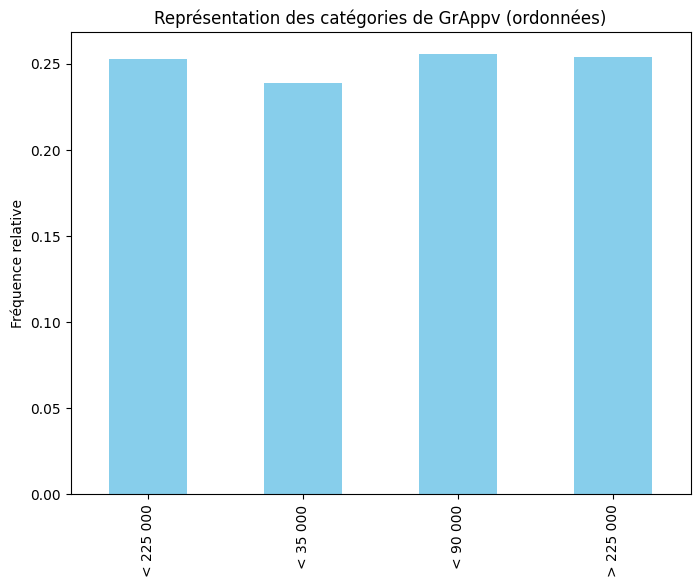

In [29]:
# Calculer les valeurs normalisées
valeurs_normalisees = df['GrAppv'].value_counts(normalize=True)

# Trier les valeurs et les index par ordre croissant
valeurs_normalisees = valeurs_normalisees.sort_index()

# Créer le bar plot avec les valeurs triées
plt.figure(figsize=(8, 6))
valeurs_normalisees.plot(kind='bar', width=0.5, color='skyblue')
plt.title('Représentation des catégories de GrAppv (ordonnées)')
plt.ylabel('Fréquence relative')
plt.xticks(rotation=90)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.show()


## Analyse des variables qualitatives: RevLineCr,LowDoc,Bank,State

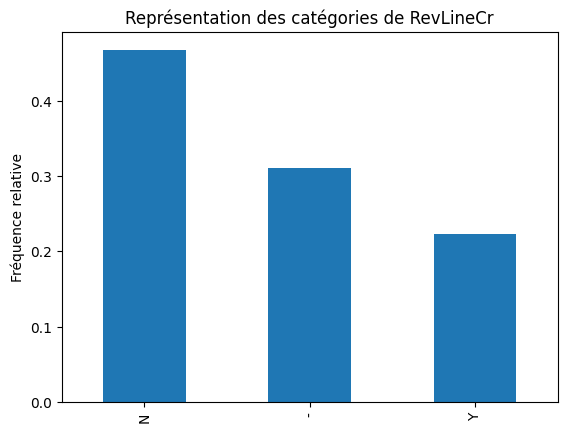

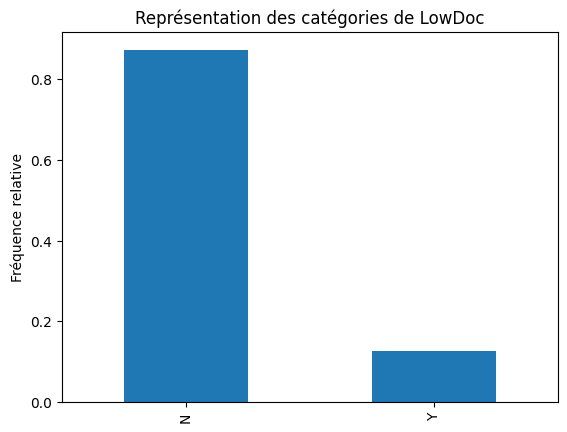

In [30]:
variables = ['RevLineCr', 'LowDoc']

for x in variables:
    df[x].value_counts(normalize=True).plot(kind='bar', width=0.5)
    # plt.xticks(rotation=90)
    plt.title(f'Représentation des catégories de {x}')
    plt.ylabel('Fréquence relative')
    plt.show()



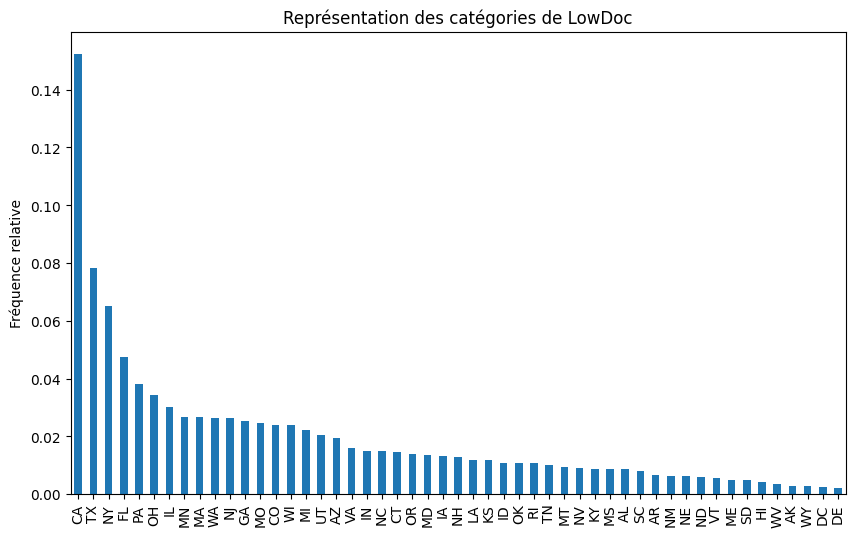

In [31]:
plt.figure(figsize=(10, 6))

    
# Tracer le graphique
df['State'].value_counts(normalize=True).plot(kind='bar', width=0.5)

plt.title(f'Représentation des catégories de {x}')
plt.ylabel('Fréquence relative')
plt.xticks(rotation=90)
plt.show()

### 

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np 

df= pd.read_csv('./data_set/SBAnational-EDA.csv')

df = df.dropna(axis=0)

X=df.drop('MIS_Status',axis=1)
y=df['MIS_Status']


variables_cat = ['State','Bank','RevLineCr','LowDoc', 'UrbanRural','Zip', 'NAICS', 'NewExist']
variables_num = ['NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'Term']

print(variables_cat)
print(variables_num)


preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), variables_cat),
    ('num', StandardScaler(), variables_num)
], remainder='drop')

preprocessor

pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('rf',RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)
)
])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05, random_state=42, stratify=y)



# Ajustement du pipeline
pipeline.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred))


# #GridSearch

# param_grid = {

#     'rf__n_estimators': np.arange(1, 10, 5),
#     'rf__max_depth': np.arange(5, 7, 1),
#     'rf__min_samples_leaf': np.arange(6, 7, 1),
#     'rf__min_samples_split': np.arange(2, 10, 1)
# }


# grid_search = GridSearchCV(pipeline,param_grid,cv=5)

# grid_search.fit(X_train,y_train)
# print('meilleures paramètres :', grid_search.best_params_)

# best_model= grid_search.best_estimator_


# # on teste le modele

# y_pred= best_model.predict(X_test)




# # calcul accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print('accuracy :', accuracy)

# print(classification_report(y_test, y_pred))

# resultat

#               precision    recall  f1-score   support

#       CHGOFF       0.84      0.60      0.70      7858
#        P I F       0.92      0.97      0.95     36881

#     accuracy                           0.91     44739
#    macro avg       0.88      0.79      0.82     44739
# weighted avg       0.91      0.91      0.90     44739


['State', 'Bank', 'RevLineCr', 'LowDoc', 'UrbanRural', 'Zip', 'NAICS', 'NewExist']
['NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'Term']
              precision    recall  f1-score   support

      CHGOFF       0.84      0.60      0.70      7858
       P I F       0.92      0.97      0.95     36881

    accuracy                           0.91     44739
   macro avg       0.88      0.79      0.82     44739
weighted avg       0.91      0.91      0.90     44739

